<a href="https://colab.research.google.com/github/Krieg2065/Python/blob/main/Divorce_Predictors_KNN_Class_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. leggere con attenzione la descrizione del dataset
2. creare un nuovo notebook Python per:
2.1 eliminare dal dataset le colonne o i dati inutili se presenti
2.2 modificare, se necessario, i dati presenti per poter utilizzare senza problemi i metodi oggetto della verifica
2.3. provare a utilizzare l'algoritmo K-NN con diversi valori di K per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando qual è il valore di K migliore e perché. Visualizzare sempre la confusion matrix e calcolare accuracy, precision e recall
2.4 provare a utilizzare l'algoritmo decision tree con diversi valori dei parametri del metodo per classificare i dati. Inserire nel notebook le varie prove effettuate spiegando quali sono i valori dei parametri che meglio descrivono il fenomeno e perché. 

Visualizzare sempre la confusion matrix e calcolare accuracy, precision e recall
2.5 fare un confronto tra i due metodi e dire quale è il migliore.
Al termine, consegnare il notebook realizzato.

In [6]:
!pip install unrar
!unrar x /content/divorce.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /content/divorce.rar


Would you like to replace the existing file divorce.csv
 19192 bytes, modified on 2019-08-21 10:17
with a new one
 19192 bytes, modified on 2019-08-21 10:17

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # K-NN!
from sklearn.tree import DecisionTreeClassifier # Decision Tree!
from sklearn import metrics

In [143]:
import pandas as pd
dataset = pd.read_excel("/content/divorce.xlsx")

In [166]:
dataset= dataset[["Atr26","Atr40","Atr18","Class"]]

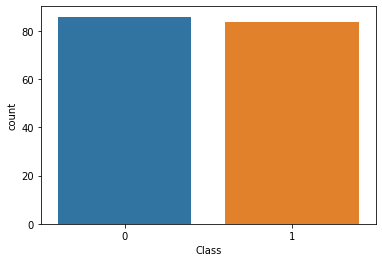

In [38]:
sns.countplot(x='Class', data=dataset)

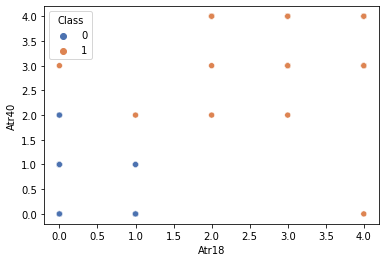

In [145]:
# Optionally, plot a 2D graph of the data by choosing 2 features 
sns.scatterplot(x='Atr18', y='Atr40', data=dataset, hue='Class', palette="deep")

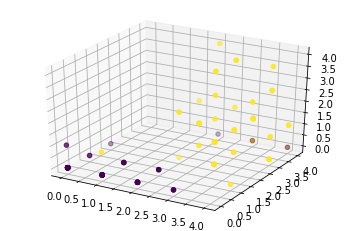

In [18]:
# Optionally, plot a 3D graph by choosing 3 features
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

# select your 3 features here
x = dataset['Atr3']
y = dataset['Atr4']
z = dataset['Atr7']
ax.scatter(x, y, z, c=dataset.Class)

plt.show()

In [167]:
# X variable contains features
# Y variable contains target value
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

X.head()

,Atr26,Atr40,Atr18
0,0,3,0
1,1,4,4
2,2,3,3
3,1,4,3
4,2,1,1


In [168]:
# x% of the data will be randomly selected at training data
# remaining (100 - x)% as testing data
training_size = 0.6
testing_size = 0.4

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testing_size)

In [169]:
# Initial model 
K = 20

model = KNeighborsClassifier(n_neighbors=K)

model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Accuracy', f'{accuracy: .3f}')

Accuracy  0.985


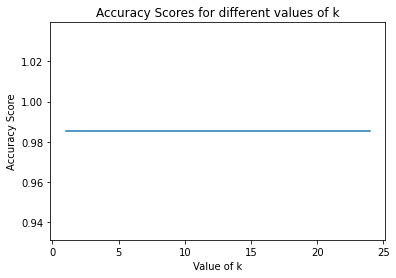

In [171]:
# checking accuracy score for k-value ranging from 1 to 30
k_range = list(range(1, 25))
scores = []

# model fitting and calculating accuracy score
# for each k-value in the range 1-30
for k in k_range:


    knn = KNeighborsClassifier(n_neighbors=k) # Create and train using this k
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    recall = recall_score(y_test, y_pred,average="weighted")
    scores.append(recall) # find the accuracy
    
# plot accuracies for each k value
plt.plot(k_range, scores)
plt.xlabel('Value of k')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for different values of k')
plt.show()

In [172]:
optimal_K = 20
model = KNeighborsClassifier(n_neighbors=optimal_K)
model.fit(X_train, y_train)
optimal_accuracy = model.score(X_test, y_test)

print(f'Optimal Accuracy achieved w/ K={optimal_K}:', f'{optimal_accuracy: .3f}')

Optimal Accuracy achieved w/ K=20:  0.985


In [173]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)
print(f'Accuracy', f'{accuracy: .3f}')

Accuracy  0.985


Final Decision Tree
x[0] = Atr26
x[1] = Atr40
x[2] = Atr18


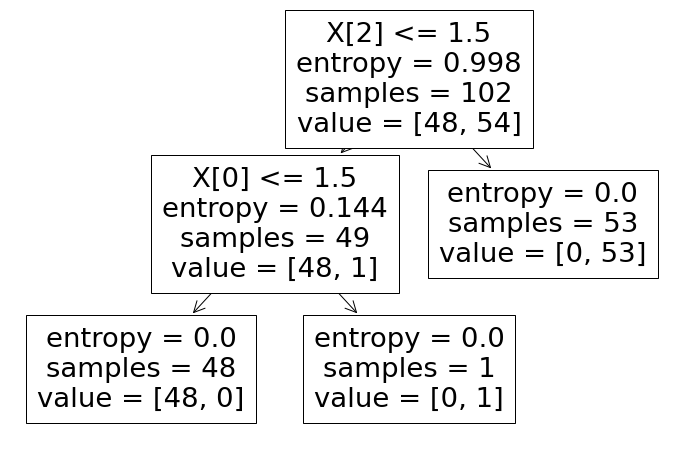

In [174]:
from sklearn import tree
#40. We're just starting a discussion before I know what's going on.
#18. My spouse and I have similar ideas about how marriage should be
#26. I know my spouse's basic anxieties.
plt.figure(figsize=(12,8))
tree.plot_tree(model)
print("Final Decision Tree")

for idx, feature in enumerate(X.columns):
  print(f'x[{idx}] = {feature}')

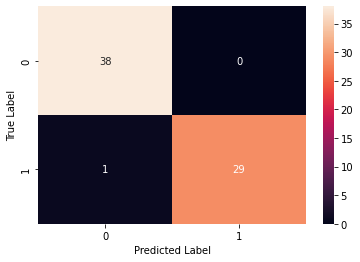

In [178]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot = True, fmt = "d")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [179]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred,average=None) # tp / (tp + fn) 
        
print(recall)

[1.         0.96666667]


In [181]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred) #2 * (recal * precision) / (recal + precision)
        
print(class_report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        38
           1       1.00      0.97      0.98        30

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68



In [180]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average=None) # tp / (tp + fn) 
        
print(recall)

[1.         0.96666667]
